### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>500 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [79]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [80]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [81]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
# your code here

# CLEAN DATA TYPES
# Fix data types: 'horsepower' is an object type, need to convert to numeric.
# Check for missing values in 'horsepower', represented by '?'.
df = df[df.horsepower != '?'].copy()
df['horsepower'] = pd.to_numeric(df['horsepower'])

# REMOVE NULL OR UNDIFINED VALUES (already handled '?' in horsepower)
# Check for any other potential null/NaN values
df.dropna(inplace=True)

# DROP THE COLUMN car-name
df.drop('car_name', axis=1, inplace=True)

# Display the cleaned data info and description
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

The feature that maximizes R-squared is: weight
The resulting best_r_squared value is: 0.6926


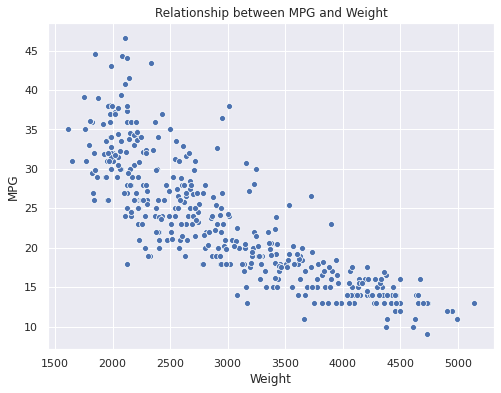

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.81e-34
Time:                        17:45:56   Log-Likelihood:                -1285.8
No. Observations:                 392   AIC:                             2576.
Df Residuals:                     390   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8120      0.716     20.676      0.0

In [82]:
# your code here

# Find the best predictor among numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('mpg') # Exclude the target variable

best_predictor = None
best_r_squared = -1

for feature in numerical_features:
    # Fit a simple linear regression model
    model = smf.ols(f'mpg ~ {feature}', data=df).fit()

    # Get R-squared value
    r2 = model.rsquared

    # Check if this is the best predictor so far
    if r2 > best_r_squared:
        best_r_squared = r2
        best_predictor = feature

print(f"The feature that maximizes R-squared is: {best_predictor}")
print(f"The resulting best_r_squared value is: {best_r_squared:.4f}")

# To create a scatter plot to visualize the relationship between mpg and weight

plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('Relationship between MPG and Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

"""
print the summary of the simple linear regression model that uses 'weight' as the predictor.

The summary of the simple linear regression model using 'weight' is shown above.

"""

print(model.summary())

# best_predictor=''
# best_r_squared=0

In [11]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

Degree 1: R-squared = 0.69263043
Degree 2: R-squared = 0.71514756
Degree 3: R-squared = 0.71514960
Degree 4: R-squared = 0.71481165
Degree 5: R-squared = 0.69344611
Degree 6: R-squared = 0.58880753
Degree 7: R-squared = 0.29640666
Degree 8: R-squared = -0.28778834
Degree 9: R-squared = -1.18557666
Degree 10: R-squared = -2.28601866

The polynomial degree that gives the best result is: 3
The best R-squared value is: 0.7151


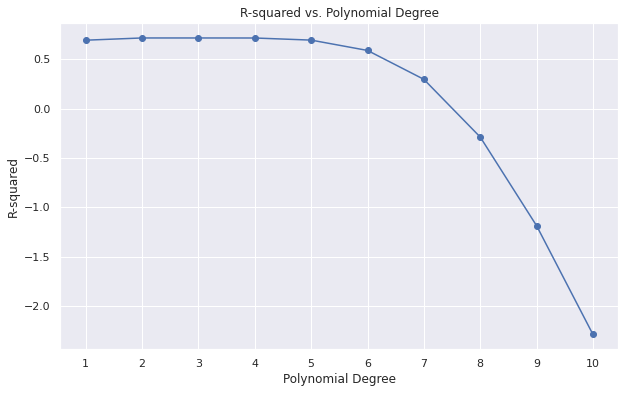

In [39]:
# return updated best_degree and best_r_squared 
# best_degree = 1
# best_r_squared = 0
# your code here

import statsmodels.formula.api as smf
import numpy as np

best_r_squared = -1
best_degree = 0

# Fit polynomial regression models up to degree 10
for degree in range(1, 11):
    # Create the formula string for the polynomial regression
    formula = 'mpg ~ weight'
    for i in range(2, degree + 1):
        formula += f' + np.power(weight, {i})'

    # Fit the model
    model = smf.ols(formula=formula, data=df).fit()

    # Get R-squared value
    r2 = model.rsquared

    # Print R-squared for the current degree
    print(f"Degree {degree}: R-squared = {r2:.8f}")

    # Check if this is the best R-squared so far
    if r2 > best_r_squared:
        best_r_squared = r2
        best_degree = degree

print(f"\nThe polynomial degree that gives the best result is: {best_degree}")
print(f"The best R-squared value is: {best_r_squared:.4f}")

# To create a scatter plot to visualize the relationship between mpg and weight

# Store R-squared values for each degree
r_squared_values = []
degrees = range(1, 11)

for degree in degrees:
    formula = 'mpg ~ weight'
    for i in range(2, degree + 1):
        formula += f' + np.power(weight, {i})'

    model = smf.ols(formula=formula, data=df).fit()
    r_squared_values.append(model.rsquared)

# Plot R-squared versus degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, r_squared_values, marker='o')
plt.title('R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')
plt.xticks(degrees)
plt.grid(True)
plt.show()

In [13]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

Degree 1: R-squared = 0.69263043
Degree 2: R-squared = 0.71514756
Degree 3: R-squared = 0.71514960
Degree 4: R-squared = 0.71548060
Degree 5: R-squared = 0.71609649
Degree 6: R-squared = 0.71656385
Degree 7: R-squared = 0.71778796
Degree 8: R-squared = 0.71779930
Degree 9: R-squared = 0.71820833
Degree 10: R-squared = 0.71989128
Degree 11: R-squared = 0.72091017
Degree 12: R-squared = 0.72092764
Degree 13: R-squared = 0.72279188
Degree 14: R-squared = 0.72400418
Degree 15: R-squared = 0.72383038
Degree 16: R-squared = 0.72428293
Degree 17: R-squared = 0.72439022
Degree 18: R-squared = 0.72441886
Degree 19: R-squared = 0.72443179
Degree 20: R-squared = 0.72452590

The polynomial degree that gives the best result with normalized weight is: 20
The best R-squared value with normalized weight is: 0.7245


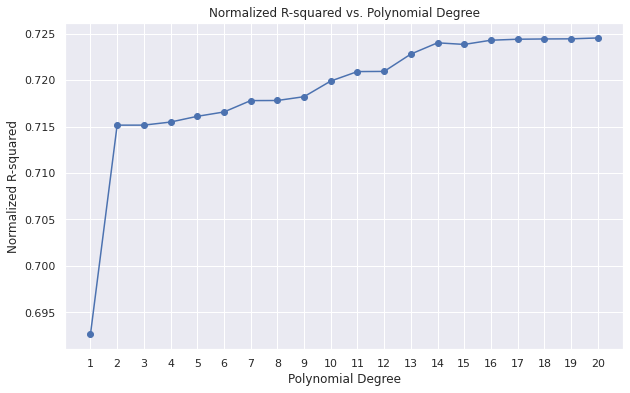

Regarding the plot and applyng Occam's Razor I define sound degree to be 2: 2


In [85]:
# best_degree = 1
# best_r_squared = 0 
# sound_degree = 1

df['weight_norm'] = df['weight']/df['weight'].mean()

# your code here

# Create the 'weight_norm' feature:
# df['weight_norm'] = df['weight'] / df['weight'].mean()

best_r_squared_norm = -1
best_degree_norm = 0

# Fit polynomial regression models up to degree 20 with normalized weight
for degree in range(1, 21):
    # Create the formula string for the polynomial regression
    formula = 'mpg ~ weight_norm'
    for i in range(2, degree + 1):
        formula += f' + np.power(weight_norm, {i})'

    # Fit the model
    model_norm = smf.ols(formula=formula, data=df).fit()

    # Get R-squared value
    r2_norm = model_norm.rsquared

    # Print R-squared for the current degree
    print(f"Degree {degree}: R-squared = {r2_norm:.8f}")

    # Check if this is the best R-squared so far
    if r2_norm > best_r_squared_norm:
        best_r_squared_norm = r2_norm
        best_degree_norm = degree

best_degree = degree
best_r_squared = r2_norm
print(f"\nThe polynomial degree that gives the best result with normalized weight is: {best_degree}")
print(f"The best R-squared value with normalized weight is: {best_r_squared:.4f}")

# MY TESTS TO FIND sound_degree

# Code to plot r2_norm versus degree
# Store R-squared values for each degree
r_squared_values_norm = []
degrees = range(1, 21)

for degree in degrees:
    formula = 'mpg ~ weight_norm'
    for i in range(2, degree + 1):
        formula += f' + np.power(weight_norm, {i})'

    model_norm = smf.ols(formula=formula, data=df).fit()
    r_squared_values_norm.append(model_norm.rsquared)

# Plot R-squared versus degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, r_squared_values_norm, marker='o')
plt.title('Normalized R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Normalized R-squared')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Regarding the plot and apllyng Occam's Razor I define sound degree to be 2

#sound_degree = r_squared_values_norm[2]
sound_degree = 2

print(f"Regarding the plot and applyng Occam's Razor I define sound degree to be 2: {sound_degree}")



In [15]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [41]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Glades,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

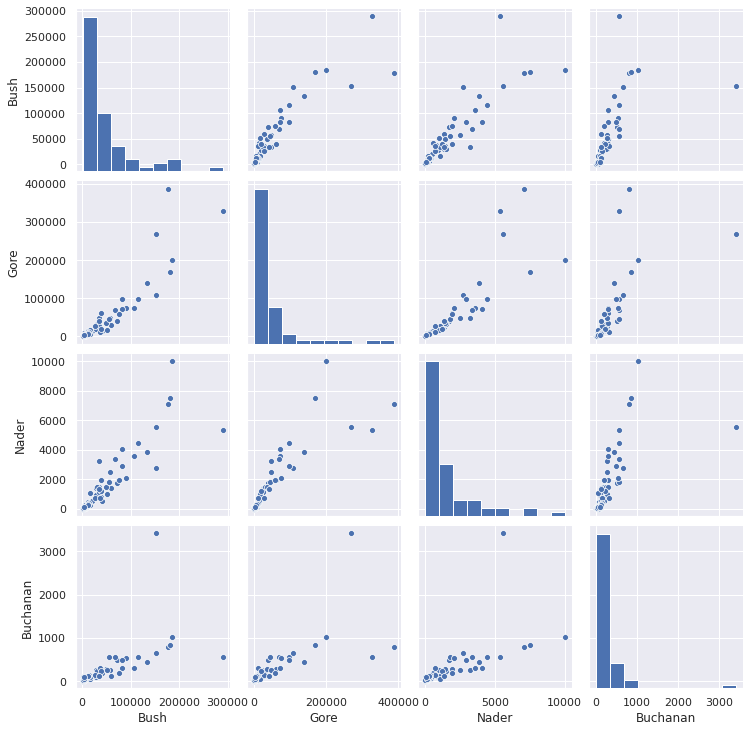

In [42]:
# plot a pair plot of the data using the seaborn library
# possible way to save the image
# plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
# your code here

sns.pairplot(votes)
plt.show()


### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [43]:
# uncomment and construct a multi-linear model 
# model = 
# your code here

# Code to construct a multi-linear model predicting the 'Bush' column using 'Gore', 'Nader', and 'Buchanan' as independent variables and print the summary table.
model = smf.ols('Bush ~ Gore + Nader + Buchanan', data=votes).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.35e-28
Time:                        13:45:07   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.0

In [19]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

In [44]:
# uncomment and construct multi-linear model 
# model_multi = 
# your code here

"""
I have initially carried out an approach addressing "Backward selection" and then a kind of "Mixed Selection"

1st drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Gore*Buchanan + Nader*Buchanan + 
+ Gore * Nader * Buchanan', data=votes).fit()
print(model_multi.summary())
1st Outcome: p-values > 0.05 for Buchanan, Gore:Nader, Gore:Buchanan and Gore:Nader:Buchanan. VERY BAD 

2nd drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan +
+ Gore * Nader * Buchanan', data=votes).fit()
print(model_multi.summary())
2nd Outcome: p-values > 0.05 for Buchanan, Gore:Nader, Gore:Buchanan and Gore:Nader:Buchanan. VERY BAD

3rd drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan + 
+ Gore * Buchanan', data=votes).fit()
print(model_multi.summary())
3rd Outcome: p-value > 0.05 for Buchanan : MUCH BETTER THAN 1st and 2nd drills

4th drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Gore*Nader + Nader*Buchanan + 
+ Gore * Buchanan', data=votes).fit()
print(model_multi.summary())
4th outcome: p-value > 0.05 for Buchanan. Probably due to the presence of Buchanan in the double interacction

5th drill: I take out all Buchanan (single and double interactions)
model_multi = smf.ols('Bush ~ Gore + Nader + Gore*Nader', data=votes).fit()
print(model_multi.summary())
5th outcome: quite good, it could work. I am going to include "single" Buchanan. Let's see...

6th drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader', data=votes).fit()
print(model_multi.summary())
6th outcome: All p-values are < 0.05. WORKS FINE to me. I am going to take this model as my multi_model for grading

"""

model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader', data=votes).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           3.28e-33
Time:                        13:45:13   Log-Likelihood:                -744.00
No. Observations:                  67   AIC:                             1498.
Df Residuals:                      62   BIC:                             1509.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    365.5675   2928.821      0.125      0.9

In [21]:
# tests model_multi

In [45]:
# tests model_multi 
# your code here

"""

I have initially carried out an approach addressing "Backward selection" and then a kind of "Mixed Selection"

1st drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Gore*Buchanan + Nader*Buchanan + 
+ Gore * Nader * Buchanan', data=votes).fit()
print(model_multi.summary())
1st Outcome: p-values > 0.05 for Buchanan, Gore:Nader, Gore:Buchanan and Gore:Nader:Buchanan. VERY BAD 
"""
model_multi_D01 = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Gore*Buchanan + Nader*Buchanan + Gore * Nader * Buchanan', data=votes).fit()
print(model_multi_D01.summary())


"""
2nd drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan +
+ Gore * Nader * Buchanan', data=votes).fit()
print(model_multi.summary())
2nd Outcome: p-values > 0.05 for Buchanan, Gore:Nader, Gore:Buchanan and Gore:Nader:Buchanan. VERY BAD
"""
# Saco la interaccion Gore*Buchanan porque su p-value en el total es 0.451, a ver que pasa...
model_multi_D02 = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan + Gore * Nader * Buchanan', data=votes).fit()
print(model_multi_D02.summary())


"""
3rd drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan + 
+ Gore * Buchanan', data=votes).fit()
print(model_multi.summary())
3rd Outcome: p-value > 0.05 for Buchanan : MUCH BETTER THAN 1st and 2nd drills
"""
# No hace nada pq la triple interaccion sigue estando: Ahora saco la triple interaccion Gore*Nader*Buchanan porque su p-value es bajo pero afecta y es 0.069 > 0,050, a ver que pasa...
model_multi_D03 = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader + Nader*Buchanan + Gore * Buchanan', data=votes).fit()
print(model_multi_D03.summary())


"""
4th drill:
model_multi = smf.ols('Bush ~ Gore + Nader + Gore*Nader + Nader*Buchanan + 
+ Gore * Buchanan', data=votes).fit()
print(model_multi.summary())
4th outcome: p-value > 0.05 for Buchanan. Probably due to the presence of Buchanan in the double interacction
"""
# Mejorando, las 2interac tiene p-values de 0. Pero el p-value de Buchanan sigue siendo alto: Saco a Buchanan, a ver que pasa...
model_multi_D04 = smf.ols('Bush ~ Gore + Nader + Gore*Nader + Nader*Buchanan + Gore * Buchanan', data=votes).fit()
print(model_multi_D04.summary())

"""
5th drill: I take out all Buchanan (single and double interactions)
model_multi = smf.ols('Bush ~ Gore + Nader + Gore*Nader', data=votes).fit()
print(model_multi.summary())
5th outcome: quite good, it could work. I am going to include "single" Buchanan. Let's see...
"""
# Regularcillo, las dobles interacciones seguian presentes y hace aparecer a Buchanan solo  Saco las dobles intercciones con Buchanan, a ver que pasa...
model_multi_D05 = smf.ols('Bush ~ Gore + Nader + Gore*Nader', data=votes).fit()
print(model_multi_D05.summary())

"""
6h drill: I include single Buchanan 
model_multi = smf.ols('Bush ~ Gore + Nader + Gore*Nader', data=votes).fit()
print(model_multi.summary())
6th outcome: The best so far
6th outcome: All p-values are < 0.05. WORKS FINE to me. I am going to take this model as my multi_model for grading
"""
# Bastante bien sin las dobles interacciones con Buchanan, pero voy a meter Buchanan otra vez sin interacciones, a ver que pasa...
model_multi_D06 = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader', data=votes).fit()
print(model_multi_D06.summary())

# Este 6th drill funciona mejor que ninguno. Lo tomo como mi resultado final para model_multi
model_multi = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore*Nader', data=votes).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           3.04e-36
Time:                        13:45:17   Log-Likelihood:                -727.34
No. Observations:                  67   AIC:                             1471.
Df Residuals:                      59   BIC:                             1488.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2945.9429   3

### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

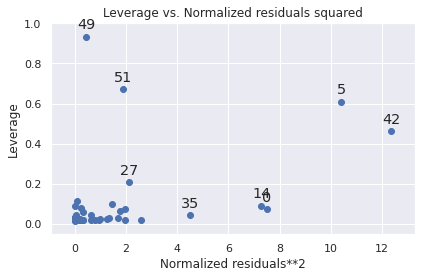

In [46]:
# plot the leverage vs. the square of the residual
# your code here

# Code to plot the leverage vs. the square of the residual using the statsmodels library.
# This plot should help in identifying influential observations in the regression model.

from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig = plot_leverage_resid2(model_multi)
fig.tight_layout(pad=1.0)
plt.show()


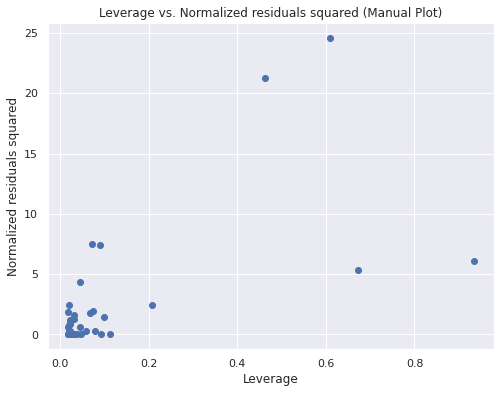

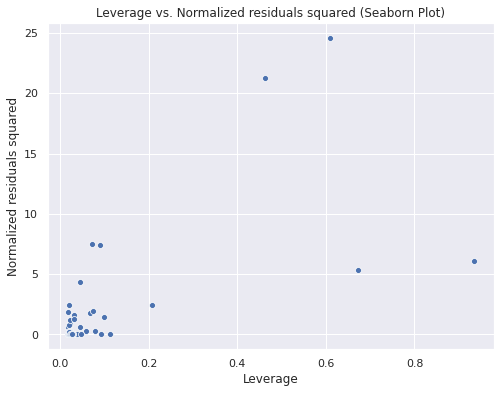

In [47]:
# you can use this cell to try different plots 
# your code here

#1st drill (first plot below)

# Code to manually calculate the values for leverage and squared normalized residuals from my
# model_multi and then create the plot using matplotlib.

# Manually calculate leverage and squared normalized residuals
leverage = model_multi.get_influence().hat_matrix_diag
# Get the normalized residuals and square them
normalized_residuals_squared = model_multi.get_influence().resid_studentized_internal**2

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(leverage, normalized_residuals_squared)
plt.xlabel('Leverage')
plt.ylabel('Normalized residuals squared')
plt.title('Leverage vs. Normalized residuals squared (Manual Plot)')
plt.grid(True)


#2nd drill (2nd plot below)

# Code for seaborn
# Code to create the leverage vs. normalized residuals squared plot using seaborn.
# The process is similar to the matplotlib version, where we first calculate the necessary values

import seaborn as sns
import matplotlib.pyplot as plt

# Manually calculate leverage and squared normalized residuals
leverage = model_multi.get_influence().hat_matrix_diag
normalized_residuals_squared = model_multi.get_influence().resid_studentized_internal**2

# Create a DataFrame for easier plotting with seaborn
plot_data = pd.DataFrame({
    'Leverage': leverage,
    'Normalized residuals squared': normalized_residuals_squared
})

# Create the scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='Leverage', y='Normalized residuals squared')
plt.xlabel('Leverage')
plt.ylabel('Normalized residuals squared')
plt.title('Leverage vs. Normalized residuals squared (Seaborn Plot)')
plt.grid(True)
plt.show()

# I should need to determine appropriate thresholds for leverage and residuals. I do not see it well in plot

plt.show()

Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [48]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points
# unusual = []
# your code here

# 1st step (FIRST TABLE)
# Identify the indices of the points with high leverage and/or high residual squared based on the plot
# The points with labels in the plot are likely the ones with high leverage and/or high residuals.
# From the plot, the labeled points are approximately at indices 5, 14, 27, 35, 42, 49, and 51.
unusual_indices = [5, 14, 27, 35, 42, 49, 51]

# Display the rows corresponding to these indices
unusual = votes.loc[unusual_indices]
print("Rows with high leverage and/or high residual squared:")
display(unusual)

# Store the indices in a list named 'unusual' as requested
unusual = unusual_indices

#Thus, Based on the leverage vs. normalized residuals squared plot, I will identify the rows with high leverage 
#and/or high squared residuals and display them. 
#I will also store their indices in a list named unusual.


# 2nd step (SECOND TABLE WITH HIGHLIGHTED VALUES)
# Code to create a table with all the plot points, including their leverage and normalized residuals squared values, 
# and highlight the top 10 based on either high leverage or high squared residuals.

# Create a DataFrame with leverage and normalized residuals squared
plot_data_with_indices = pd.DataFrame({
    'Leverage': leverage,
    'Normalized residuals squared': normalized_residuals_squared
})

# Add a column for the original index
plot_data_with_indices['Original Index'] = plot_data_with_indices.index

# Sort by Leverage in descending order and get the top 10
top_10_leverage = plot_data_with_indices.sort_values(by='Leverage', ascending=False).head(10)

# Sort by Normalized residuals squared in descending order and get the top 10
top_10_residuals_squared = plot_data_with_indices.sort_values(by='Normalized residuals squared', ascending=False).head(10)

# Combine the indices from both top 10 lists and remove duplicates
highlight_indices = pd.concat([top_10_leverage, top_10_residuals_squared])['Original Index'].unique()

# Function to highlight rows based on index
def highlight_rows(row):
    if row['Original Index'] in highlight_indices:
        return ['background-color: yellow'] * len(row)
    else:
        return [''] * len(row)

# Display the full table with highlighting
print("Table of all plot points with top 10 high leverage and/or high residual squared highlighted:")
display(plot_data_with_indices.style.apply(highlight_rows, axis=1))

# 3rd step (THIRD TABLE WITH THE TOP 10 POTENCIAL CONFLICTING INDEXES (VOTING PLACES))
# code to list in descending order the top 10 points based on either high leverage or high squared residuals.
# Display the rows from the original DataFrame for the identified highlight_indices,
# sorted by Leverage in descending order to show the top points.
# Note: highlight_indices contains unique indices from the top 10 of both leverage and squared residuals.
# I could sort by either metric for display. I sort by Leverage here.

top_points = votes.loc[highlight_indices].copy()
top_points['Leverage'] = leverage[highlight_indices]
top_points['Normalized residuals squared'] = normalized_residuals_squared[highlight_indices]

top_points_sorted = top_points.sort_values(by='Leverage', ascending=False).head(10)

print("Top 10 points with high leverage or high residual squared (sorted by Leverage):")
display(top_points_sorted)

Rows with high leverage and/or high residual squared:


,county,Bush,Gore,Nader,Buchanan
5,Broward,177902,387703,7104,795
14,Duval,152098,107864,2757,652
27,Hillsborough,180760,169557,7490,847
35,Leon,39062,61427,1932,282
42,MiamiDade,289533,328808,5352,560
49,PalmBeach,152951,269732,5565,3411
51,Pinellas,184825,200630,10022,1013


Table of all plot points with top 10 high leverage and/or high residual squared highlighted:


,Leverage,Normalized residuals squared,Original Index
0,0.072787,7.485292,0
1,0.028300,0.039210,1
2,0.017877,0.597114,2
3,0.027215,0.012657,3
4,0.091280,0.002365,4
5,0.608573,24.592559,5
6,0.028990,0.005287,6
7,0.021648,0.289183,7
8,0.020077,0.290363,8
9,0.018461,1.839074,9


Top 10 points with high leverage or high residual squared (sorted by Leverage):


,county,Bush,Gore,Nader,Buchanan,Leverage,Normalized residuals squared
49,PalmBeach,152951,269732,5565,3411,0.934057,6.100903
51,Pinellas,184825,200630,10022,1013,0.671406,5.320788
5,Broward,177902,387703,7104,795,0.608573,24.592559
42,MiamiDade,289533,328808,5352,560,0.461920,21.278005
27,Hillsborough,180760,169557,7490,847,0.207153,2.477972
47,Orange,134517,140220,3879,446,0.112576,0.068409
55,Sarasota,83100,72853,4069,305,0.100026,1.475621
4,Brevard,115185,97318,4470,570,0.091280,0.002365
14,Duval,152098,107864,2757,652,0.090574,7.407817
34,Lee,106141,73560,3587,305,0.078640,0.251983


In [29]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [49]:
# develop your model_final here
# model_final = 
# your code here
"""
I have tested my model_multi to rebuild it by removing some the unusual points with a view to meet the 
CRITERIA: for all coefficients p,0.05 and R2 > 0.95

I have carried out the following drills:
Removing index 49 (PalmBeach) FAILED
Removing index 49 (PalmBeach) and 51 (Pinellas) FAILED
Removing index 5 (Broward) 49 (PalmBeach) and 51 (Pinellas) FAILED
Removing index 5 (Broward) 42 (MiamiDade) and 51 (Pinellas) FAILED
Removing index 5 (Broward) 42 (MiamiDade) 49 (PalmBeach) and 51 (Pinellas) FAILED
Removing index 5 (Broward) 27 (Hillsborough) 42 (MiamiDade) 49 (PalmBeach) and 51 (Pinellas) FAILED
Removing index 5 (Broward) and 14 (Duval) PASSED :)))
"""

# Final code to rebuild the model_multi 
# by removing the unusual point 5 corresponding to Broward and also 
# by removing the unusual point 14 corresponding to Duval and also.

# Create a new DataFrame by dropping the rows with indices 5, and 42
votes_cleaned_two_points = votes.drop(index=[5, 14]).copy()

# Rebuild the model using the cleaned data
model_multi_cleaned_two_points = smf.ols('Bush ~ Gore + Nader + Buchanan + Gore:Nader', data=votes_cleaned_two_points).fit()

# Print the summary of the new model
# print("Summary of the model after removing Broward (index 5) and Duval (index 14):")

# print(model_multi_cleaned_two_points.summary())

model_final = model_multi_cleaned_two_points

#print (f"\nFINAL MODEL -removing Broward(index 5) and Duval(index 14)- is: ")

txt1 = "FINAL MODEL is: "
txt2 = "-removing Broward(index 5) and Duval(index 14)-"

print ('\n')
print (txt1.center(80, '='))
print (txt2.center(80, '0'))
print ('\n')

print (model_final.summary())

# Get R-squared value for final model
r2_final = model_final.rsquared

#Print R-squared value for final model
print(f"\nR-squared for final model= {r2_final:.3f}")

# ESTE ES EL BUENO! Com todos los p-values de los coeficientes por debajo de 0.05 y R2 mayor que 0.95 :)))




================================FINAL MODEL is: ================================
0000000000000000-removing Broward(index 5) and Duval(index 14)-00000000000000000


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     322.7
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           7.92e-40
Time:                        13:45:54   Log-Likelihood:                -698.52
No. Observations:                  65   AIC:                             1407.
Df Residuals:                      60   BIC:                             1418.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

In [ ]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

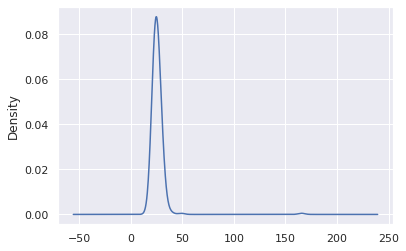

In [50]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [51]:
# form new table cfat and model bmi
# cfat = 
# bmi = 
# your code here

# Display the dataframe
display(fat)

cfat = fat[fat['BMI'] <= 40].copy()
display (cfat)

largefat = fat[fat['BMI'] >= 40].copy()
display (largefat)

# Code to to create a cleaned DataFrame cfat by removing rows with BMI greater than 40 and then perform a regression analysis.
# Create cfat by removing rows with BMI > 40
cfat = fat[fat['BMI'] <= 40].copy()

# Perform regression analysis
bmi = smf.ols('Density ~ BMI', data=cfat).fit()

# Display the summary of the regression model (No need to display this)
# display(bmi.summary())

print(bmi.summary())

# Get R-squared value for bmi model
r2_bmi = bmi.rsquared
#Print R-squared value for final model
print(f"\nR-squared for BMI model= {r2_bmi:.3f}")


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,69.966566,1.72085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.626779
1,1.0853,6.1,22,78.584814,1.83515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.334338
2,1.0414,25.3,22,69.853168,1.68275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.668737
3,1.0751,10.4,26,83.801122,1.83515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.883227
4,1.0340,28.7,24,83.574326,1.80975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.517358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.894726,1.70180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.026290
248,1.0236,33.6,72,91.171992,1.77165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.047288
249,1.0328,29.3,72,84.708306,1.67640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.141905
250,1.0399,26.0,72,86.522674,1.79070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.982629


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,69.966566,1.72085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.626779
1,1.0853,6.1,22,78.584814,1.83515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.334338
2,1.0414,25.3,22,69.853168,1.68275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.668737
3,1.0751,10.4,26,83.801122,1.83515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.883227
4,1.0340,28.7,24,83.574326,1.80975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.517358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.894726,1.70180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.026290
248,1.0236,33.6,72,91.171992,1.77165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.047288
249,1.0328,29.3,72,84.708306,1.67640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.141905
250,1.0399,26.0,72,86.522674,1.79070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.982629


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,1.0202,35.2,46,164.721935,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.911198
41,1.0250,32.9,44,92.986360,0.74930,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.618094


                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           3.25e-43
Time:                        13:46:09   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.0

In [34]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

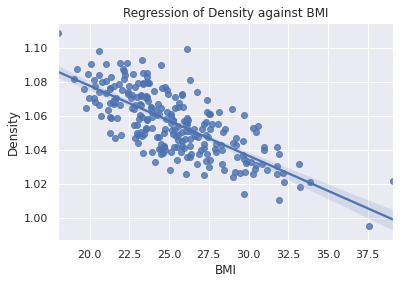

In [52]:
# plot regression model against BMI measurement
# properly label the scatterplot axs and show the regression line
# your code here

# Code to plot the regression model with title, labeled axes and the regression line
sns.regplot(x='BMI', y='Density', data=cfat)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Regression of Density against BMI')
plt.show()

 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [53]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

Note: Set **random_state = 0** in sklearn's split function

In [54]:
# construct train_fat and test_fat from cfat dataset 
# your code here

# code to construct training and test sets from cfat dataset. T
# The resulting data frame are named train_fat and test_fat.
# The train_fat includes randomly selected 125 observations and the test_fat has the rest
# Set random_state = 0 in sklearn's split function


from sklearn.model_selection import train_test_split

# Split the cfat dataset into training and testing sets
train_fat, test_fat = train_test_split(cfat, test_size=None, train_size=125, random_state=0)

# Display the shapes of the training and testing sets to verify the split
print("Shape of train_fat:", train_fat.shape)
print("Shape of test_fat:", test_fat.shape)

display(train_fat)
display(test_fat)


Shape of train_fat: (125, 16)
Shape of test_fat: (125, 16)


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
147,1.0322,29.6,25,93.666748,1.77165,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4,29.842114
217,1.0819,7.5,51,70.079964,1.77800,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6,22.168196
64,1.0264,32.3,57,93.213156,1.77800,40.1,105.3,105.5,108.3,65.0,41.2,24.7,35.3,31.1,18.4,29.485853
140,1.0422,24.9,40,80.172386,1.80340,37.4,98.6,93.1,101.6,59.1,39.6,21.6,30.8,27.9,16.6,24.651348
192,1.0624,15.9,42,87.770052,1.79070,40.7,104.9,94.1,102.7,60.6,38.6,24.7,34.0,30.1,18.7,27.371632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.0693,12.9,55,71.100546,1.81610,36.3,94.4,84.6,94.3,51.2,37.4,21.6,27.3,27.1,17.3,21.557253
194,1.0470,22.8,42,73.822098,1.84785,35.4,92.2,85.6,96.5,60.2,38.9,22.4,31.7,27.1,17.1,21.619864
119,1.0575,18.1,44,85.048500,1.83515,38.0,101.8,87.5,101.0,58.5,39.2,24.5,32.1,28.6,18.0,25.253613
49,1.0903,4.0,47,57.832980,1.69545,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,20.118963


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
227,1.0418,25.2,55,90.038012,1.88595,38.3,105.3,96.7,106.6,64.0,42.6,23.4,33.2,30.0,18.4,25.314278
124,1.0674,13.8,50,73.028312,1.68910,37.7,98.9,84.1,94.0,58.5,36.6,23.5,34.4,29.2,18.0,25.596497
94,1.0785,9.0,47,83.574326,1.89230,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.339573
159,1.0477,22.5,31,80.399182,1.81610,36.2,101.1,92.4,99.3,59.4,39.0,24.6,30.1,28.2,18.2,24.376543
156,1.0287,31.2,28,93.326554,1.75260,38.5,105.6,105.0,106.4,68.6,40.0,25.2,35.2,30.7,19.1,30.383627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1.0771,9.6,47,72.801516,1.78435,36.0,99.8,83.9,91.8,53.0,36.2,22.5,31.4,27.5,17.7,22.865481
48,1.0678,13.6,45,61.575114,1.73990,32.8,92.3,83.4,90.4,52.0,35.8,20.6,28.8,25.5,16.3,20.340267
173,1.0603,16.9,36,79.945590,1.81610,38.7,98.2,90.3,99.9,59.2,37.7,21.5,32.4,28.4,17.8,24.239017
247,1.0736,11.0,70,60.894726,1.70180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.026290


In [ ]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [56]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391695
Weight 0.3118316510507495
Height 0.013604499535144865
Neck 0.2365970437510022
Chest 0.48319067404353544
Abdomen 0.6569981103212716
Hip 0.309611004446523
Thigh 0.20523437265112665
Knee 0.14348108465750553
Ankle 0.08478533257962062
Biceps 0.23065760452385575
Forearm 0.08974003323360791
Wrist 0.10016498175577282
best: ['Abdomen', 0.6569981103212716]


In [62]:
# uncomment and update your solution 
# train_bmi1 = 

# your code here

# ALGORITM FOR K = 1 WITH DATA=train_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors = []
current_formula = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula, data=train_fat).fit().rsquared_adj
models_forward_stepwise = {}

# Perform forward stepwise selection for 4 steps
for k in range(1, 2): # Nota para mi: Aqui voy variando k, en este caso seria k = 1
    best_r2_this_step = -1
    best_new_predictor = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors:
                formula_to_test = f'Density ~ {" + ".join(selected_predictors + [predictor])}'
            else:
                formula_to_test = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test = smf.ols(formula_to_test, data=train_fat).fit()
            adjusted_r2_this_test = model_to_test.rsquared_adj
            rsquared_this_test = model_to_test.rsquared

            print(f"formula_to_test for step {k}: '{formula_to_test}'")
            print(f"rsquared_this_test for step {k}: '{rsquared_this_test}'")
            print(f"adjusted_r2_this_test for step {k}: '{adjusted_r2_this_test}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test > best_r2_this_step:
                best_r2_this_step = adjusted_r2_this_test
                best_new_predictor = predictor
                best_model_this_step = model_to_test

    # Add the best new predictor to the selected predictors
    if best_new_predictor:
        selected_predictors.append(best_new_predictor)
        current_formula = f'Density ~ {" + ".join(selected_predictors)}'
        best_adjusted_r2 = best_r2_this_step
        models_forward_stepwise[k] = best_model_this_step
        print(f"best model for step {k}: '{current_formula}'")
        print(f"Step {k}: Added to selected_predictors: '{best_new_predictor}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        print (f"Selected predictors at step {k}: {selected_predictors}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
#display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
train_bmi1 = best_model_this_step
print (f"Summary for the resulting model for k=1 is train_bmi1:")
print (f"",train_bmi1.summary())


formula_to_test for step 1: 'Density ~ Age'
rsquared_this_test for step 1: '0.11891818526391695'
adjusted_r2_this_test for step 1: '0.11175491847744479'


formula_to_test for step 1: 'Density ~ Weight'
rsquared_this_test for step 1: '0.3118316510507495'
adjusted_r2_this_test for step 1: '0.30623678642514585'


formula_to_test for step 1: 'Density ~ Height'
rsquared_this_test for step 1: '0.013604499535144865'
adjusted_r2_this_test for step 1: '0.005585023921609533'


formula_to_test for step 1: 'Density ~ Neck'
rsquared_this_test for step 1: '0.2365970437510022'
adjusted_r2_this_test for step 1: '0.23039051565141688'


formula_to_test for step 1: 'Density ~ Chest'
rsquared_this_test for step 1: '0.48319067404353544'
adjusted_r2_this_test for step 1: '0.47898897220649106'


formula_to_test for step 1: 'Density ~ Abdomen'
rsquared_this_test for step 1: '0.6569981103212716'
adjusted_r2_this_test for step 1: '0.6542094770718512'


formula_to_test for step 1: 'Density ~ Hip'
rsquared_this_t

In [ ]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [63]:
# your code here

# ALGORITM FOR K = 2 WITH DATA=train_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors = []
current_formula = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula, data=train_fat).fit().rsquared_adj
models_forward_stepwise = {}

# Perform forward stepwise selection for 4 steps
for k in range(1, 3): # Nota para mi: Aqui voy variando k, en este caso seria k = 2
    best_r2_this_step = -1
    best_new_predictor = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors:
                formula_to_test = f'Density ~ {" + ".join(selected_predictors + [predictor])}'
            else:
                formula_to_test = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test = smf.ols(formula_to_test, data=train_fat).fit()
            adjusted_r2_this_test = model_to_test.rsquared_adj
            rsquared_this_test = model_to_test.rsquared

            print(f"formula_to_test for step {k}: '{formula_to_test}'")
            print(f"rsquared_this_test for step {k}: '{rsquared_this_test}'")
            print(f"adjusted_r2_this_test for step {k}: '{adjusted_r2_this_test}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test > best_r2_this_step:
                best_r2_this_step = adjusted_r2_this_test
                best_new_predictor = predictor
                best_model_this_step = model_to_test

    # Add the best new predictor to the selected predictors
    if best_new_predictor:
        selected_predictors.append(best_new_predictor)
        current_formula = f'Density ~ {" + ".join(selected_predictors)}'
        best_adjusted_r2 = best_r2_this_step
        models_forward_stepwise[k] = best_model_this_step
        print(f"best model for step {k}: '{current_formula}'")
        print(f"Step {k}: Added to selected_predictors: '{best_new_predictor}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        print (f"Selected predictors at step {k}: {selected_predictors}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
#display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
train_bmi2 = best_model_this_step
print (f"Summary for the resulting model for k=2 is train_bmi2:")
print (f"",train_bmi2.summary())

# train_bmi2 = 

formula_to_test for step 1: 'Density ~ Age'
rsquared_this_test for step 1: '0.11891818526391695'
adjusted_r2_this_test for step 1: '0.11175491847744479'


formula_to_test for step 1: 'Density ~ Weight'
rsquared_this_test for step 1: '0.3118316510507495'
adjusted_r2_this_test for step 1: '0.30623678642514585'


formula_to_test for step 1: 'Density ~ Height'
rsquared_this_test for step 1: '0.013604499535144865'
adjusted_r2_this_test for step 1: '0.005585023921609533'


formula_to_test for step 1: 'Density ~ Neck'
rsquared_this_test for step 1: '0.2365970437510022'
adjusted_r2_this_test for step 1: '0.23039051565141688'


formula_to_test for step 1: 'Density ~ Chest'
rsquared_this_test for step 1: '0.48319067404353544'
adjusted_r2_this_test for step 1: '0.47898897220649106'


formula_to_test for step 1: 'Density ~ Abdomen'
rsquared_this_test for step 1: '0.6569981103212716'
adjusted_r2_this_test for step 1: '0.6542094770718512'


formula_to_test for step 1: 'Density ~ Hip'
rsquared_this_t

### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [64]:
# your code here

# ALGORITM FOR K = 3 WITH DATA=train_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors = []
current_formula = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula, data=train_fat).fit().rsquared_adj
models_forward_stepwise = {}

# Perform forward stepwise selection for 4 steps
for k in range(1, 4): # Nota para mi: Aqui voy variando k, en este caso seria k = 3
    best_r2_this_step = -1
    best_new_predictor = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors:
                formula_to_test = f'Density ~ {" + ".join(selected_predictors + [predictor])}'
            else:
                formula_to_test = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test = smf.ols(formula_to_test, data=train_fat).fit()
            adjusted_r2_this_test = model_to_test.rsquared_adj
            rsquared_this_test = model_to_test.rsquared

            print(f"formula_to_test for step {k}: '{formula_to_test}'")
            print(f"rsquared_this_test for step {k}: '{rsquared_this_test}'")
            print(f"adjusted_r2_this_test for step {k}: '{adjusted_r2_this_test}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test > best_r2_this_step:
                best_r2_this_step = adjusted_r2_this_test
                best_new_predictor = predictor
                best_model_this_step = model_to_test

    # Add the best new predictor to the selected predictors
    if best_new_predictor:
        selected_predictors.append(best_new_predictor)
        current_formula = f'Density ~ {" + ".join(selected_predictors)}'
        best_adjusted_r2 = best_r2_this_step
        models_forward_stepwise[k] = best_model_this_step
        print(f"best model for step {k}: '{current_formula}'")
        print(f"Step {k}: Added to selected_predictors: '{best_new_predictor}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        print (f"Selected predictors at step {k}: {selected_predictors}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
#display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
train_bmi3 = best_model_this_step
print (f"Summary for the resulting model for k=3 is train_bmi3:")
print (f"",train_bmi3.summary())

# train_bmi3 = 

formula_to_test for step 1: 'Density ~ Age'
rsquared_this_test for step 1: '0.11891818526391695'
adjusted_r2_this_test for step 1: '0.11175491847744479'


formula_to_test for step 1: 'Density ~ Weight'
rsquared_this_test for step 1: '0.3118316510507495'
adjusted_r2_this_test for step 1: '0.30623678642514585'


formula_to_test for step 1: 'Density ~ Height'
rsquared_this_test for step 1: '0.013604499535144865'
adjusted_r2_this_test for step 1: '0.005585023921609533'


formula_to_test for step 1: 'Density ~ Neck'
rsquared_this_test for step 1: '0.2365970437510022'
adjusted_r2_this_test for step 1: '0.23039051565141688'


formula_to_test for step 1: 'Density ~ Chest'
rsquared_this_test for step 1: '0.48319067404353544'
adjusted_r2_this_test for step 1: '0.47898897220649106'


formula_to_test for step 1: 'Density ~ Abdomen'
rsquared_this_test for step 1: '0.6569981103212716'
adjusted_r2_this_test for step 1: '0.6542094770718512'


formula_to_test for step 1: 'Density ~ Hip'
rsquared_this_t

### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [65]:
# your code here

# ALGORITM FOR K = 4 WITH DATA=train_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors = []
current_formula = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula, data=train_fat).fit().rsquared_adj
models_forward_stepwise = {}

# Perform forward stepwise selection for 4 steps
for k in range(1, 5): # Nota para mi: Aqui voy variando k, en este caso seria k = 4
    best_r2_this_step = -1
    best_new_predictor = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors:
                formula_to_test = f'Density ~ {" + ".join(selected_predictors + [predictor])}'
            else:
                formula_to_test = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test = smf.ols(formula_to_test, data=train_fat).fit()
            adjusted_r2_this_test = model_to_test.rsquared_adj
            rsquared_this_test = model_to_test.rsquared

            print(f"formula_to_test for step {k}: '{formula_to_test}'")
            print(f"rsquared_this_test for step {k}: '{rsquared_this_test}'")
            print(f"adjusted_r2_this_test for step {k}: '{adjusted_r2_this_test}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test > best_r2_this_step:
                best_r2_this_step = adjusted_r2_this_test
                best_new_predictor = predictor
                best_model_this_step = model_to_test

    # Add the best new predictor to the selected predictors
    if best_new_predictor:
        selected_predictors.append(best_new_predictor)
        current_formula = f'Density ~ {" + ".join(selected_predictors)}'
        best_adjusted_r2 = best_r2_this_step
        models_forward_stepwise[k] = best_model_this_step
        print(f"best model for step {k}: '{current_formula}'")
        print(f"Step {k}: Added to selected_predictors: '{best_new_predictor}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        print (f"Selected predictors at step {k}: {selected_predictors}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
#display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
train_bmi4 = best_model_this_step
print (f"Summary for the resulting model for k=4 is train_bmi4:")
print (f"",train_bmi4.summary())

# train_bmi4 = 

formula_to_test for step 1: 'Density ~ Age'
rsquared_this_test for step 1: '0.11891818526391695'
adjusted_r2_this_test for step 1: '0.11175491847744479'


formula_to_test for step 1: 'Density ~ Weight'
rsquared_this_test for step 1: '0.3118316510507495'
adjusted_r2_this_test for step 1: '0.30623678642514585'


formula_to_test for step 1: 'Density ~ Height'
rsquared_this_test for step 1: '0.013604499535144865'
adjusted_r2_this_test for step 1: '0.005585023921609533'


formula_to_test for step 1: 'Density ~ Neck'
rsquared_this_test for step 1: '0.2365970437510022'
adjusted_r2_this_test for step 1: '0.23039051565141688'


formula_to_test for step 1: 'Density ~ Chest'
rsquared_this_test for step 1: '0.48319067404353544'
adjusted_r2_this_test for step 1: '0.47898897220649106'


formula_to_test for step 1: 'Density ~ Abdomen'
rsquared_this_test for step 1: '0.6569981103212716'
adjusted_r2_this_test for step 1: '0.6542094770718512'


formula_to_test for step 1: 'Density ~ Hip'
rsquared_this_t

### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [67]:
# your code here

# ALGORITM FOR K = 5 WITH DATA=train_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors = []
current_formula = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula, data=train_fat).fit().rsquared_adj
models_forward_stepwise = {}

# Perform forward stepwise selection for 4 steps
for k in range(1, 6): # Nota para mi: Aqui voy variando k, en este caso seria k = 5
    best_r2_this_step = -1
    best_new_predictor = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors:
                formula_to_test = f'Density ~ {" + ".join(selected_predictors + [predictor])}'
            else:
                formula_to_test = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test = smf.ols(formula_to_test, data=train_fat).fit()
            adjusted_r2_this_test = model_to_test.rsquared_adj
            rsquared_this_test = model_to_test.rsquared

            print(f"formula_to_test for step {k}: '{formula_to_test}'")
            print(f"rsquared_this_test for step {k}: '{rsquared_this_test}'")
            print(f"adjusted_r2_this_test for step {k}: '{adjusted_r2_this_test}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test > best_r2_this_step:
                best_r2_this_step = adjusted_r2_this_test
                best_new_predictor = predictor
                best_model_this_step = model_to_test

    # Add the best new predictor to the selected predictors
    if best_new_predictor:
        selected_predictors.append(best_new_predictor)
        current_formula = f'Density ~ {" + ".join(selected_predictors)}'
        best_adjusted_r2 = best_r2_this_step
        models_forward_stepwise[k] = best_model_this_step
        print(f"best model for step {k}: '{current_formula}'")
        print(f"Step {k}: Added to selected_predictors: '{best_new_predictor}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        print (f"Selected predictors at step {k}: {selected_predictors}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
# display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
train_bmi5 = best_model_this_step
print (f"Summary for the resulting model for k=5 is train_bmi5:")
print (f"",train_bmi5.summary())

# train_bmi5 = 

formula_to_test for step 1: 'Density ~ Age'
rsquared_this_test for step 1: '0.11891818526391695'
adjusted_r2_this_test for step 1: '0.11175491847744479'


formula_to_test for step 1: 'Density ~ Weight'
rsquared_this_test for step 1: '0.3118316510507495'
adjusted_r2_this_test for step 1: '0.30623678642514585'


formula_to_test for step 1: 'Density ~ Height'
rsquared_this_test for step 1: '0.013604499535144865'
adjusted_r2_this_test for step 1: '0.005585023921609533'


formula_to_test for step 1: 'Density ~ Neck'
rsquared_this_test for step 1: '0.2365970437510022'
adjusted_r2_this_test for step 1: '0.23039051565141688'


formula_to_test for step 1: 'Density ~ Chest'
rsquared_this_test for step 1: '0.48319067404353544'
adjusted_r2_this_test for step 1: '0.47898897220649106'


formula_to_test for step 1: 'Density ~ Abdomen'
rsquared_this_test for step 1: '0.6569981103212716'
adjusted_r2_this_test for step 1: '0.6542094770718512'


formula_to_test for step 1: 'Density ~ Hip'
rsquared_this_t

### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

[0.6542094770718512, 0.7298968547424141, 0.7441772156787978, 0.7506001901244437, 0.7578732528786704]
[1, 2, 3, 4, 5]
<class 'list'>
[1, 2, 3, 4, 5]


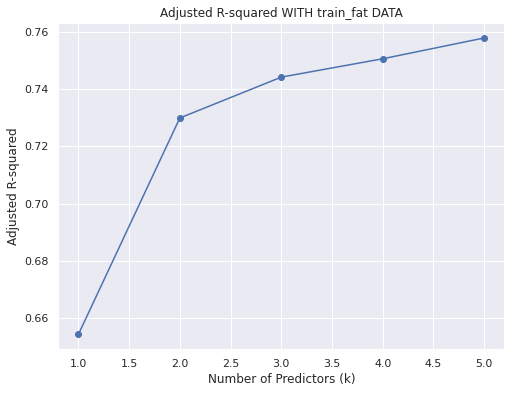

formula_to_test_withTestFat for step 1: 'Density ~ Age'
rsquared_this_test_withTestFat for step 1: '0.0431651346370745'
adjusted_r2_this_test_withTestFat for step 1: '0.03538598939022153'


formula_to_test_withTestFat for step 1: 'Density ~ Weight'
rsquared_this_test_withTestFat for step 1: '0.42122794561026033'
adjusted_r2_this_test_withTestFat for step 1: '0.4165224817534332'


formula_to_test_withTestFat for step 1: 'Density ~ Height'
rsquared_this_test_withTestFat for step 1: '0.0024487548527768466'
adjusted_r2_this_test_withTestFat for step 1: '-0.005661417871997365'


formula_to_test_withTestFat for step 1: 'Density ~ Neck'
rsquared_this_test_withTestFat for step 1: '0.20720315177363124'
adjusted_r2_this_test_withTestFat for step 1: '0.20075764894252257'


formula_to_test_withTestFat for step 1: 'Density ~ Chest'
rsquared_this_test_withTestFat for step 1: '0.44076452447278025'
adjusted_r2_this_test_withTestFat for step 1: '0.43621789459044513'


formula_to_test_withTestFat for st

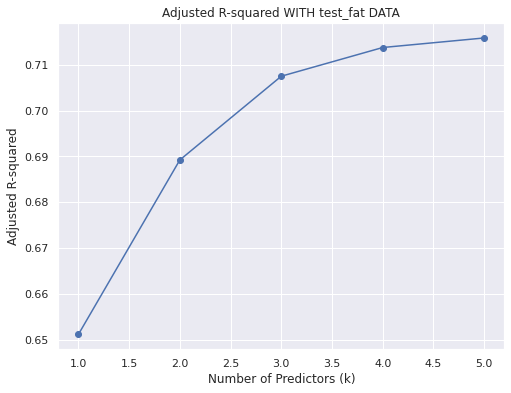

In [76]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# your code here

# Code to plot adjusted R2 for models train_bmi1, train_bmi2, train_bmi3, train_bmi4 and train_bmi5 vs number of predictors (k = 1, 2, 3, 4, 5)
# Extract the adjusted R-squared values and number of predictors for each model
adjusted_r2_values = [
    train_bmi1.rsquared_adj,
    train_bmi2.rsquared_adj,
    train_bmi3.rsquared_adj,
    train_bmi4.rsquared_adj,
    train_bmi5.rsquared_adj
]

number_of_predictors = [1, 2, 3, 4, 5]
adjr2_train = adjusted_r2_values

print(adjr2_train)
print(number_of_predictors)
print (type(adjusted_r2_values))
print(number_of_predictors)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(number_of_predictors, adjr2_train, marker='o', linestyle='-')
plt.xlabel('Number of Predictors (k)')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared WITH train_fat DATA')
plt.grid(True)
plt.show()

# ALGORITM FOR K = 5 WITH DATA=test_fat
# Code to perform forward stepwise selection to find the best four predictors based on adjusted R-squared
# Initialize variables
selected_predictors_withTestFat = []
current_formula_withTestFat = 'Density ~ 1'
best_adjusted_r2 = smf.ols(current_formula_withTestFat, data=test_fat).fit().rsquared_adj #OJO!!!!! aqui a data = cfat y la variable la uso de referencia (no le pongo "withTestFat")
models_forward_stepwise_withTestData = {}
test_fat_adj_r2_values = {} # Dictionary to store adjusted R-squared values for test_fat

# Perform forward stepwise selection for 5 steps
for k in range(1, 6): # Nota para mi: Aqui voy variando k, en este caso seria k = 5
    best_r2_this_step_withTestFat = -1
    best_new_predictor_withTestFat = None

    # Try adding each allowed factor that is not already selected
    for predictor in allowed_factors:
        if predictor not in selected_predictors_withTestFat:
            # Create the formula with the current selected predictors and the new predictor
            if selected_predictors_withTestFat:
                formula_to_test_withTestFat = f'Density ~ {" + ".join(selected_predictors_withTestFat + [predictor])}'
            else:
                formula_to_test_withTestFat = f'Density ~ {predictor}'

                #print(f"formula_to_test for step {k}: '{formula_to_test}'")

            # Fit the model and get the adjusted R-squared
            model_to_test_withTestFat = smf.ols(formula_to_test_withTestFat, data=test_fat).fit() # OJO!!! aqui me aparece por primera vez test_fat
            adjusted_r2_this_test_withTestFat = model_to_test_withTestFat.rsquared_adj
            rsquared_this_test_withTestFat = model_to_test_withTestFat.rsquared

            print(f"formula_to_test_withTestFat for step {k}: '{formula_to_test_withTestFat}'")
            print(f"rsquared_this_test_withTestFat for step {k}: '{rsquared_this_test_withTestFat}'")
            print(f"adjusted_r2_this_test_withTestFat for step {k}: '{adjusted_r2_this_test_withTestFat}'")
            print("\n")

            # Check if this model is better than the current best for this step
            if adjusted_r2_this_test_withTestFat > best_r2_this_step_withTestFat:
                best_r2_this_step_withTestFat = adjusted_r2_this_test_withTestFat
                best_new_predictor_withTestFat = predictor
                best_model_this_step_withTestFat = model_to_test_withTestFat

    # Add the best new predictor to the selected predictors
    if best_new_predictor_withTestFat:
        selected_predictors_withTestFat.append(best_new_predictor_withTestFat)
        current_formula_withTestFat = f'Density ~ {" + ".join(selected_predictors_withTestFat)}'
        best_adjusted_r2 = best_r2_this_step_withTestFat # OJO!!! aqui va la referencia de la decl de varables a best_adjusted_r2 SIN (WITHOUT) "_withTestData"
        models_forward_stepwise_withTestData[k] = best_model_this_step_withTestFat
        test_fat_adj_r2_values[k] = best_adjusted_r2 # Store the adjusted R-squared
        print(f"best model with TESTFAT for step {k}: '{current_formula_withTestFat}'")
        print(f"Step {k}: Added to selected_predictors_withTestFat: '{best_new_predictor_withTestFat}'. Adjusted R-squared: {best_adjusted_r2:.3f}")
        #adjr2_test = best_adjusted_r2
        #test_fat_bmi[k] = best_model_this_step_withTestFat
        print (f"Selected predictors_with_TestFat at step {k}: {selected_predictors_withTestFat}")
        print("\n")
    else:
        print("No more predictors to add.")

# Display the summary of the final model with 4 predictors
# print("\nSummary of the final model with 4 predictors from forward stepwise selection:")
#display(models_forward_stepwise[4].summary())
# print (models_forward_stepwise[1].summary())
#test_fat_bmi[k] = best_model_this_step
#print (f"Summary for the resulting model for k=5 is train_bmi5:")
# print (f"",train_bmi5.summary())

# Code to convert the dictionary test_fat_adj_r2_values into a list of adjusted R2 values and name it as adjr2_tes
# Convert the dictionary values to a list
adjr2_test = list(test_fat_adj_r2_values.values())

# Display the lists adjr2_train and adjr2_test
print("\nAdjusted R2 values with train_fat", adjr2_train)
print("\nAdjusted R2 values with test_fat", adjr2_test)


number_of_predictors = [1, 2, 3, 4, 5]
adjr2_test = list(test_fat_adj_r2_values.values())

print(adjr2_test)
print(number_of_predictors)
print (type(adjr2_test))
print(number_of_predictors)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(number_of_predictors, adjr2_test, marker='o', linestyle='-')
plt.xlabel('Number of Predictors (k)')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared WITH test_fat DATA')
plt.grid(True)
plt.show()

In [ ]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment. 